# Task 6.1 Sourcing Open Data

### Contents
** **
A) Standard prerequisites, including library loading, path setup, and data import from Step 4.

Step 1:  Data exploration and sanity-checking.


## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [1]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [3]:
# Import itertools to help loop through lots of things.
import itertools

In [4]:
# I want to convert Date-Timestamps into UNIX Epoch time for analysis.
from datetime import datetime

In [5]:
# Set a PATH variable.

In [6]:
# Linux PATH, local - Sadly, my Linux system with 8GB of total RAM could not import the full dataset.
# I have moved to an AWS EC2 instance that should be able to handle this.

In [7]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [8]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/')

In [9]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM.

In [10]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

## Load our prospective source data for exploration and evaluation.

In [11]:
# Source is from https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events?resource=download ,
# downloaded May 23, 2023.

In [12]:
print(os.path.join(path, '02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events', 'WeatherEvents_Jan2016-Dec2021.csv'))

/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events/WeatherEvents_Jan2016-Dec2021.csv


In [13]:
df = pd.read_csv(os.path.join(path, '02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events', 'WeatherEvents_Jan2016-Dec2021.csv'))

In [14]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479165 entries, 0 to 7479164
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   EventId            object 
 1   Type               object 
 2   Severity           object 
 3   StartTime(UTC)     object 
 4   EndTime(UTC)       object 
 5   Precipitation(in)  float64
 6   TimeZone           object 
 7   AirportCode        object 
 8   LocationLat        float64
 9   LocationLng        float64
 10  City               object 
 11  County             object 
 12  State              object 
 13  ZipCode            float64
dtypes: float64(4), object(10)
memory usage: 4.8 GB


In [15]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [16]:
df.tail()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
7479160,W-7577193,Storm,Severe,2021-12-26 18:19:00,2021-12-26 18:29:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
7479161,W-7577194,Snow,Light,2021-12-26 18:29:00,2021-12-26 18:38:00,0.02,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
7479162,W-7577195,Snow,Light,2021-12-28 00:53:00,2021-12-28 02:27:00,0.08,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
7479163,W-7577196,Snow,Moderate,2021-12-28 02:27:00,2021-12-28 03:09:00,0.09,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
7479164,W-7577197,Snow,Light,2021-12-28 03:09:00,2021-12-28 03:19:00,0.01,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


In [17]:
df.shape

(7479165, 14)

In [18]:
df.dtypes

EventId               object
Type                  object
Severity              object
StartTime(UTC)        object
EndTime(UTC)          object
Precipitation(in)    float64
TimeZone              object
AirportCode           object
LocationLat          float64
LocationLng          float64
City                  object
County                object
State                 object
ZipCode              float64
dtype: object

In [19]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'City', 'County', 'State', 'ZipCode'],
      dtype='object')

In [20]:
df.describe(include='all')

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
count,7479165,7479165,7479165,7479165,7479165,7.479165e+06,7479165,7479165,7.479165e+06,7.479165e+06,7464602,7479165,7479165,7.419931e+06
unique,7479165,7,6,1980059,1940056,NaN,4,2071,NaN,NaN,1716,1100,48,NaN
top,W-1,Rain,Light,2017-03-12 06:15:00,2016-03-13 06:15:00,NaN,US/Central,K3TH,NaN,NaN,Jacksonville,Lincoln,TX,NaN
freq,1,4397546,4489255,116,103,NaN,3097364,13499,NaN,NaN,31112,76225,516199,NaN
mean,NaN,NaN,NaN,NaN,NaN,9.518492e-02,NaN,NaN,3.873336e+01,-9.192213e+01,NaN,NaN,NaN,5.247809e+04
std,NaN,NaN,NaN,NaN,NaN,9.185906e-01,NaN,NaN,5.464815e+00,1.347916e+01,NaN,NaN,NaN,2.571490e+04
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,2.455710e+01,-1.245550e+02,NaN,NaN,NaN,1.022000e+03
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,3.449780e+01,-9.782830e+01,NaN,NaN,NaN,3.131400e+04
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,3.927500e+01,-8.982220e+01,NaN,NaN,NaN,5.401700e+04
75%,NaN,NaN,NaN,NaN,NaN,5.000000e-02,NaN,NaN,4.295500e+01,-8.195650e+01,NaN,NaN,NaN,7.352100e+04


In [21]:
# The next line is expendable.

In [22]:
df['Type'].value_counts()

Rain             4397546
Fog              1722738
Snow              980411
Cold              197691
Precipitation     128836
Storm              49203
Hail                2740
Name: Type, dtype: int64

In [23]:
# The next line is expendable.

In [24]:
df.loc[df['Type'] == 'Cold'].head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
10,W-11,Cold,Severe,2016-01-09 16:54:00,2016-01-09 20:34:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
16,W-17,Cold,Severe,2016-01-10 13:14:00,2016-01-10 21:34:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
17,W-18,Cold,Severe,2016-01-11 12:14:00,2016-01-11 12:54:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
47,W-48,Cold,Severe,2016-02-04 13:25:00,2016-02-04 14:35:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
50,W-51,Cold,Severe,2016-02-16 18:36:00,2016-02-16 19:54:00,0.0,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [25]:
# Checking which states are represented.

In [26]:
df['State'].value_counts().sort_index()

AL    172138
AR    137131
AZ     56071
CA    309425
CO    169836
CT     41850
DE     14385
FL    325703
GA    250453
IA    211031
ID     85844
IL    243412
IN    133701
KS    103896
KY    115939
LA    194485
MA    107782
MD     68114
ME     79042
MI    358578
MN    383750
MO    117692
MS    125043
MT     90577
NC    317292
ND    136052
NE    126682
NH     65524
NJ     69072
NM     72731
NV     31310
NY    182789
OH    183926
OK    157282
OR    152965
PA    180072
RI     22399
SC    182235
SD     80623
TN     70098
TX    516199
UT     39952
VA    231925
VT     50141
WA    191272
WI    272537
WV     88522
WY    161687
Name: State, dtype: int64

In [27]:
len(df['State'].value_counts().sort_index())

48

In [28]:
# Function for looping through columns to look for mixed data types.  Copy pasta from Exercise 4.5 - I need to understand the 'type' function and this
# extended df.iloc.apply.any syntax!
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

City


In [29]:
# OK, what's supposedly mixed about the City column?

In [30]:
df['City'].value_counts().sort_index()

Abbeville                   4809
Aberdeen                   12195
Aberdeen Proving Ground     3584
Abilene                     2184
Abingdon                    5305
                           ...  
Yuma                         467
Zanesville                  4690
Zapata                      2331
Zephyrhills                 3969
Zionsville                  5264
Name: City, Length: 1716, dtype: int64

In [31]:
unique_values = df['City'].unique()

for value in unique_values:
    print(value, type(value))


Saguache <class 'str'>
Altus <class 'str'>
Albert Lea <class 'str'>
Baton Rouge <class 'str'>
Sparta <class 'str'>
Driggs <class 'str'>
Grand Rapids <class 'str'>
Hutchinson <class 'str'>
Kemmerer <class 'str'>
Pittsfield <class 'str'>
Kansas City <class 'str'>
Tulsa <class 'str'>
Las Cruces <class 'str'>
Davis <class 'str'>
Roebuck <class 'str'>
Sanford <class 'str'>
Westerly <class 'str'>
Worcester <class 'str'>
Charlotte <class 'str'>
Williamsburg <class 'str'>
Milwaukee <class 'str'>
East Haven <class 'str'>
Scappoose <class 'str'>
Dickinson <class 'str'>
Redwood Falls <class 'str'>
Troutdale <class 'str'>
Hinckley <class 'str'>
Freedom <class 'str'>
Angel Fire <class 'str'>
Jamestown <class 'str'>
Alexandria <class 'str'>
Alamosa <class 'str'>
Green <class 'str'>
Brookings <class 'str'>
Williams <class 'str'>
Carson City <class 'str'>
Bloomfield <class 'str'>
El Paso <class 'str'>
Pine Bluffs <class 'str'>
Peachtree City <class 'str'>
Marthasville <class 'str'>
Greenwood <class 's

In [32]:
unique_values = df['City'].unique()

for value in unique_values:
    if not isinstance(value, str):
        print(value, type(value))


nan <class 'float'>


In [33]:
# Ah, the "mixed" type comes from a null!  Let's confirm.

In [34]:
df.isnull().sum()

EventId                  0
Type                     0
Severity                 0
StartTime(UTC)           0
EndTime(UTC)             0
Precipitation(in)        0
TimeZone                 0
AirportCode              0
LocationLat              0
LocationLng              0
City                 14563
County                   0
State                    0
ZipCode              59234
dtype: int64

### I'm somewhat disappointed that we have so many nulls for City and ZipCode.  Let's explore those a bit.

In [35]:
df.loc[df['City'].isnull() == True]

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
194050,W-196704,Cold,Severe,2016-01-01 08:57:00,2016-01-04 15:32:00,0.00,US/Pacific,KNSI,33.2338,-119.4559,NaN,Ventura County,CA,NaN
194051,W-196705,Rain,Light,2016-01-04 22:49:00,2016-01-04 23:30:00,0.00,US/Pacific,KNSI,33.2338,-119.4559,NaN,Ventura County,CA,NaN
194052,W-196706,Cold,Severe,2016-01-05 00:35:00,2016-01-05 15:32:00,0.00,US/Pacific,KNSI,33.2338,-119.4559,NaN,Ventura County,CA,NaN
194053,W-196707,Rain,Light,2016-01-05 15:32:00,2016-01-05 17:57:00,0.20,US/Pacific,KNSI,33.2338,-119.4559,NaN,Ventura County,CA,NaN
194054,W-196708,Rain,Moderate,2016-01-05 17:57:00,2016-01-05 18:09:00,0.14,US/Pacific,KNSI,33.2338,-119.4559,NaN,Ventura County,CA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412417,W-4469870,Rain,Light,2021-12-29 15:05:00,2021-12-29 15:22:00,0.00,US/Central,KHEY,31.3460,-85.6543,NaN,Dale County,AL,NaN
4412418,W-4469871,Rain,Light,2021-12-29 16:19:00,2021-12-29 16:34:00,0.00,US/Central,KHEY,31.3460,-85.6543,NaN,Dale County,AL,NaN
4412419,W-4469872,Rain,Light,2021-12-29 19:05:00,2021-12-29 19:15:00,0.00,US/Central,KHEY,31.3460,-85.6543,NaN,Dale County,AL,NaN
4412420,W-4469873,Rain,Light,2021-12-30 04:56:00,2021-12-30 05:05:00,0.00,US/Central,KHEY,31.3460,-85.6543,NaN,Dale County,AL,NaN


In [36]:
df.loc[df['City'].isnull() == True]['AirportCode'].value_counts()

KHEY    6422
KW43    3452
KNSI    3286
KABH    1403
Name: AirportCode, dtype: int64

In [37]:
df.loc[df['AirportCode'] == 'KABH']

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
729442,W-739666,Snow,Light,2016-01-07 14:54:00,2016-01-07 16:54:00,0.01,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN
729443,W-739667,Snow,Light,2016-01-07 20:30:00,2016-01-07 21:54:00,0.03,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN
729444,W-739668,Snow,Light,2016-01-07 22:07:00,2016-01-08 02:33:00,0.09,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN
729445,W-739669,Rain,Light,2016-01-08 02:54:00,2016-01-08 03:52:00,0.00,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN
729446,W-739670,Fog,Severe,2016-01-08 03:52:00,2016-01-08 04:54:00,0.00,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730840,W-741064,Snow,Light,2021-12-10 16:43:00,2021-12-10 17:42:00,0.00,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN
730841,W-741065,Storm,Severe,2021-12-15 14:54:00,2021-12-15 15:09:00,0.00,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN
730842,W-741066,Storm,Severe,2021-12-15 18:54:00,2021-12-15 21:54:00,0.00,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN
730843,W-741067,Rain,Light,2021-12-24 23:42:00,2021-12-25 00:54:00,0.04,US/Mountain,KABH,38.7578,-104.3013,NaN,El Paso,CO,NaN


In [38]:
# Making sure the affected airports have NO rows with a 'City' value.

In [39]:
df.loc[df['AirportCode'] == 'KHEY']['City'].value_counts()

Series([], Name: City, dtype: int64)

In [40]:
df.loc[df['AirportCode'] == 'KW43']['City'].value_counts()

Series([], Name: City, dtype: int64)

In [41]:
df.loc[df['AirportCode'] == 'KNSI']['City'].value_counts()

Series([], Name: City, dtype: int64)

In [42]:
df.loc[df['AirportCode'] == 'KABH']['City'].value_counts()

Series([], Name: City, dtype: int64)

In [43]:
# OK, I googled these four airport codes with no 'City' value associated with them.
# Three of the four are military-related.
# The fourth, KW43, is Hulett Municipal Airport, two nautical miles southeast of Hulett, Wyoming.
# Since none appear to be "in" a city as such, I think it best to ignore the 'City' column; I might even remove it.

In [44]:
# Looking into the missing ZipCode values, next.  I bet they will also be associated with "out-of-the-way" airports.

In [45]:
df.loc[df['ZipCode'].isnull() == True]['AirportCode'].value_counts()

KMLP    13240
KHEY     6422
KMWN     6207
K5SM     4482
KVCT     3842
KW43     3452
KNSI     3286
KCRV     2743
KNBT     2413
KAPY     2331
KHMS     2168
KBPC     1916
KALK     1663
K4MR     1653
KABH     1403
KENV     1106
KFTN      907
Name: AirportCode, dtype: int64

In [46]:
len(df.loc[df['ZipCode'].isnull() == True]['AirportCode'].value_counts())

17

In [47]:
df_zipless_ac = df.loc[df['ZipCode'].isnull() == True]['AirportCode'].unique()

In [48]:
df_zipless_ac

array(['KNBT', 'KNSI', 'KABH', 'KENV', 'KAPY', 'KBPC', 'KMLP', 'KMWN',
       'KW43', 'KHEY', 'K4MR', 'K5SM', 'KALK', 'KVCT', 'KCRV', 'KFTN',
       'KHMS'], dtype=object)

In [49]:
for airport in df_zipless_ac:
    print (df.loc[df['AirportCode'] == airport]['ZipCode'].value_counts())

Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)
Series([], Name: ZipCode, dtype: int64)


In [50]:
for airport in df_zipless_ac:
    print (df.loc[df['AirportCode'] == airport][['City', 'State']].value_counts())

City   State
Davis  NC       2413
dtype: int64
Series([], dtype: int64)
Series([], dtype: int64)
City      State
Wendover  UT       1106
dtype: int64
City    State
Zapata  TX       2331
dtype: int64
City   State
Miami  TX       1916
dtype: int64
City    State
Mullan  ID       13240
dtype: int64
City      State
Sargents  NH       6207
dtype: int64
Series([], dtype: int64)
Series([], dtype: int64)
City   State
Elida  NM       1653
dtype: int64
City              State
Glenwood Springs  CO       4482
dtype: int64
City          State
Sierra Vista  AZ       1663
dtype: int64
City      State
Victoria  TX       3842
dtype: int64
City           State
Bald Mountain  CO       2743
dtype: int64
City             State
Carrizo Springs  TX       907
dtype: int64
City          State
Hanford Site  WA       2168
dtype: int64


### I've found that the airports lacking City names are simpl not in cities.  However, airports that have City values yet lack ZIP codes, might be missing data:  I researched three of them, and two do posess ZIP codes.  Neither column seems likely to matter for this project, though.  I will keep them for now, in case I change my mind, but I may drop them later for memory and CPU savings.

### Looking for duplicate records.

In [51]:
df_dups = df[df.duplicated()]

In [52]:
df_dups.shape

(0, 14)

In [53]:
df_dups

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode


### No full duplicates found.

### We should also check for duplicate EventId values.

In [54]:
df_dups_EventId = df[df.duplicated(subset=['EventId'])]

In [55]:
df_dups_EventId.shape

(0, 14)

In [56]:
df_dups_EventId

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode


### There are no duplicate EventId values.

### To be a little more thorough, let's look for multiple occurrences of the same StartTime and EndTime with the same  AirportCode.

In [57]:
df_dups_Start_Airport = df[df.duplicated(subset=['StartTime(UTC)', 'AirportCode'])]

In [58]:
df_dups_Start_Airport.shape

(18, 14)

In [59]:
df_dups_Start_Airport

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
822612,W-833885,Rain,Light,2021-11-07 06:35:00,2021-11-07 06:55:00,0.02,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822614,W-833887,Rain,Light,2021-11-07 06:55:00,2021-11-07 07:15:00,0.03,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
1168586,W-1184182,Fog,Moderate,2020-11-01 09:52:00,2020-11-01 10:52:00,0.00,US/Pacific,KNZY,32.6922,-117.2098,San Diego,San Diego,CA,92135.0
1250140,W-1266756,Rain,Moderate,2020-11-01 06:55:00,2020-11-01 07:55:00,0.18,US/Eastern,KANJ,46.4794,-84.3572,Sault Sainte Marie,Chippewa,MI,49783.0
1564600,W-1585284,Rain,Heavy,2021-11-07 06:55:00,2021-11-07 07:52:00,0.38,US/Eastern,KSVN,32.0100,-81.1457,Savannah,Chatham,GA,31409.0
3348444,W-3391826,Rain,Moderate,2021-11-07 06:55:00,2021-11-07 07:15:00,0.14,US/Eastern,KGGE,33.3117,-79.3196,Georgetown,Georgetown,SC,29440.0
3452608,W-3497356,Rain,Moderate,2021-11-07 06:53:00,2021-11-07 07:53:00,0.16,US/Eastern,KCRE,33.8162,-78.7204,North Myrtle Beach,Horry,SC,29582.0
3614934,W-3661632,Rain,Moderate,2021-11-07 06:56:00,2021-11-07 07:56:00,0.21,US/Eastern,KMYR,33.6797,-78.9283,Myrtle Beach,Horry,SC,29577.0
3939088,W-3989970,Rain,Moderate,2019-11-03 06:53:00,2019-11-03 07:09:00,0.16,US/Eastern,KDKK,42.4932,-79.2762,Dunkirk,Chautauqua,NY,14048.0
4670973,W-4731967,Precipitation,UNK,2019-11-03 06:53:00,2019-11-03 06:58:00,0.26,US/Eastern,KPBI,26.6851,-80.0992,West Palm Beach,Palm Beach,FL,33406.0


In [60]:
df_dups_End_Airport = df[df.duplicated(subset=['EndTime(UTC)', 'AirportCode'])]

In [61]:
df_dups_End_Airport.shape

(18, 14)

In [62]:
df_dups_End_Airport

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
822611,W-833884,Rain,Moderate,2021-11-07 06:35:00,2021-11-07 06:35:00,0.10,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822613,W-833886,Rain,Moderate,2021-11-07 06:55:00,2021-11-07 06:55:00,0.12,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
1250139,W-1266755,Rain,Light,2020-11-01 06:55:00,2020-11-01 06:55:00,0.05,US/Eastern,KANJ,46.4794,-84.3572,Sault Sainte Marie,Chippewa,MI,49783.0
1516557,W-1536585,Rain,Moderate,2021-11-07 09:56:00,2021-11-07 09:56:00,0.14,US/Pacific,KOTH,43.4195,-124.2437,North Bend,Coos,OR,97459.0
1564599,W-1585283,Rain,Moderate,2021-11-07 06:55:00,2021-11-07 06:55:00,0.10,US/Eastern,KSVN,32.0100,-81.1457,Savannah,Chatham,GA,31409.0
3348443,W-3391825,Rain,Light,2021-11-07 06:55:00,2021-11-07 06:55:00,0.08,US/Eastern,KGGE,33.3117,-79.3196,Georgetown,Georgetown,SC,29440.0
3452607,W-3497355,Rain,Heavy,2021-11-07 06:53:00,2021-11-07 06:53:00,0.31,US/Eastern,KCRE,33.8162,-78.7204,North Myrtle Beach,Horry,SC,29582.0
3614933,W-3661631,Rain,Heavy,2021-11-07 06:56:00,2021-11-07 06:56:00,0.31,US/Eastern,KMYR,33.6797,-78.9283,Myrtle Beach,Horry,SC,29577.0
3939087,W-3989969,Rain,Light,2019-11-03 06:53:00,2019-11-03 06:53:00,0.06,US/Eastern,KDKK,42.4932,-79.2762,Dunkirk,Chautauqua,NY,14048.0
4670972,W-4731966,Rain,Heavy,2019-11-03 06:53:00,2019-11-03 06:53:00,0.68,US/Eastern,KPBI,26.6851,-80.0992,West Palm Beach,Palm Beach,FL,33406.0


### Hmmm, I'm surprised by the results.  Let's look into the suspect entries for Airport KSUT.

In [63]:
df_KSUT_suspect = df.loc[(df['AirportCode'] == 'KSUT') & (df['EventId'].str.startswith('W-83388'))]

In [64]:
df_KSUT_suspect.shape

(10, 14)

In [65]:
df_KSUT_suspect

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
822607,W-833880,Rain,Moderate,2021-11-07 04:35:00,2021-11-07 05:15:00,0.46,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822608,W-833881,Rain,Light,2021-11-07 05:15:00,2021-11-07 05:35:00,0.07,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822609,W-833882,Rain,Moderate,2021-11-07 05:35:00,2021-11-07 06:15:00,0.33,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822610,W-833883,Rain,Light,2021-11-07 06:15:00,2021-11-07 06:35:00,0.06,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822611,W-833884,Rain,Moderate,2021-11-07 06:35:00,2021-11-07 06:35:00,0.10,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822612,W-833885,Rain,Light,2021-11-07 06:35:00,2021-11-07 06:55:00,0.02,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822613,W-833886,Rain,Moderate,2021-11-07 06:55:00,2021-11-07 06:55:00,0.12,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822614,W-833887,Rain,Light,2021-11-07 06:55:00,2021-11-07 07:15:00,0.03,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822615,W-833888,Rain,Light,2021-11-07 07:55:00,2021-11-07 08:15:00,0.00,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0
822616,W-833889,Rain,Light,2021-11-07 11:35:00,2021-11-07 11:55:00,0.02,US/Eastern,KSUT,33.9292,-78.0722,Southport,Brunswick,NC,28461.0


### For KSUT, it looks like the duplicates arise from two events that each last less than one second, i.e. their Start and End Times are the same.
### Do we see the same phenomenon for the other airports?

In [66]:
# Look for lines were StartTime(UTC) and EndTime(UTC) are identical for a given airport.

In [67]:
df_micro_events = df.loc[df['StartTime(UTC)'] == df['EndTime(UTC)']]

In [68]:
df_micro_events

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
101876,W-103205,Snow,Light,2020-11-01 07:15:00,2020-11-01 07:15:00,0.00,US/Central,K04W,46.0244,-92.8991,Hinckley,Pine,MN,55037.0
148483,W-150530,Fog,Severe,2021-11-07 07:55:00,2021-11-07 07:55:00,0.00,US/Central,KFYG,38.5876,-90.9938,Marthasville,Warren,MO,63357.0
367097,W-372333,Fog,Severe,2019-11-03 07:15:00,2019-11-03 07:15:00,0.00,US/Central,KLXY,31.6412,-96.5144,Mexia,Limestone,TX,76667.0
716783,W-726704,Snow,Light,2019-11-03 07:53:00,2019-11-03 07:53:00,0.00,US/Central,KPIR,44.3827,-100.2860,Pierre,Hughes,SD,57501.0
793055,W-804001,Snow,Light,2020-11-01 07:55:00,2020-11-01 07:55:00,0.00,US/Central,KCBG,45.5628,-93.2644,Cambridge,Isanti,MN,55008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326092,W-7422022,Rain,Light,2017-11-05 09:55:00,2017-11-05 09:55:00,0.01,US/Pacific,KS47,45.4175,-123.8087,Tillamook,Tillamook,OR,97141.0
7408757,W-7505805,Rain,Light,2017-11-05 09:35:00,2017-11-05 09:35:00,0.00,US/Pacific,KTDO,46.4772,-122.8065,Toledo,Lewis,WA,98591.0
7413848,W-7510896,Rain,Light,2021-11-07 09:35:00,2021-11-07 09:35:00,0.00,US/Pacific,KTDO,46.4772,-122.8065,Toledo,Lewis,WA,98591.0
7419635,W-7516895,Cold,Severe,2017-11-05 08:55:00,2017-11-05 08:55:00,0.00,US/Mountain,KSHC,41.9308,-109.9687,Green River,Sweetwater,WY,82935.0


### If we remove these "micro-events," will that dispose of all duplicate Start and End times?

In [69]:
df_no_micro_events = df.merge(df_micro_events, indicator=True, how='left')

In [70]:
df_no_micro_events = df_no_micro_events[df_no_micro_events['_merge'] == 'left_only']

In [71]:
df_no_micro_events = df_no_micro_events.drop(columns='_merge')

In [72]:
df_no_micro_events.shape

(7479051, 14)

In [73]:
df_no_micro_events_dups = df_no_micro_events[df_no_micro_events.duplicated()]

In [74]:
df_no_micro_events_dups.shape

(0, 14)

In [75]:
df_no_micro_events_dups

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode


### Indeed, all the duplicate Start and End Times were the result of those zero-second "micro events."
### The original paper cited by the data source does not give details about whether any airport weather stations collected their data manually, but my general background reading indicates that smaller airfields may not have automated data collection.  If, in fact, some of these weather stations collect data manually, then the 114 micro events could be the result of human error.  The fact that these micro events also account for all of the duplicate records, further emboldens me to presume they are human error and can properly be discarded.

### Let's rename our de-duplicated dataframe to be easier to type, and then drop the prior dataframes to save memory.

In [76]:
df_dedup = df_no_micro_events

In [77]:
del df, df_no_micro_events_dups, df_micro_events, df_zipless_ac, df_dups, df_dups_EventId, df_dups_Start_Airport, df_dups_End_Airport, df_KSUT_suspect

In [78]:
df_dedup.shape

(7479051, 14)

### I would like to see the duration for each event.  Let's calculate new columns 'StartTime(Epoch)' and 'EndTime(Epoch)', then use them to derive event durations.

In [79]:
df_duration = df_dedup

In [80]:
df_duration.shape

(7479051, 14)

In [81]:
df_duration['StartTime(Epoch)'] = df_duration['StartTime(UTC)'].apply(lambda x: int(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp()))

In [82]:
df_duration.shape

(7479051, 15)

In [83]:
df_duration.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch)
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452122040
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452140040
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452146040
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452231240
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452261240


In [84]:
df_duration['EndTime(Epoch)'] = df_duration['EndTime(UTC)'].apply(lambda x: int(datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp()))

In [85]:
df_duration.shape

(7479051, 16)

In [86]:
df_duration.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch)
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452122040,1452126840
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452140040,1452142440
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452146040,1452180840
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452231240,1452232440
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452261240,1452268440


In [87]:
df_duration['Duration(seconds)'] = df_duration['EndTime(Epoch)'] - df_duration['StartTime(Epoch)']

In [88]:
df_duration.shape

(7479051, 17)

In [89]:
df_duration.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds)
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452122040,1452126840,4800
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452140040,1452142440,2400
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452146040,1452180840,34800
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452231240,1452232440,1200
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452261240,1452268440,7200


In [90]:
df_duration['Duration(hours)'] = (df_duration['EndTime(Epoch)'] - df_duration['StartTime(Epoch)'])/3600

In [91]:
df_duration.shape

(7479051, 18)

In [92]:
df_duration.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours)
0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452122040,1452126840,4800,1.333333
1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452140040,1452142440,2400,0.666667
2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452146040,1452180840,34800,9.666667
3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452231240,1452232440,1200,0.333333
4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0,1452261240,1452268440,7200,2.000000


### Let's poke around with different EDA tools.

### Do any values (especially minima and maxima) look strange?

In [93]:
df_duration.describe()

,Precipitation(in),LocationLat,LocationLng,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours)
count,7.479051e+06,7.479051e+06,7.479051e+06,7.419817e+06,7.479051e+06,7.479051e+06,7.479051e+06,7.479051e+06
mean,9.518600e-02,3.873336e+01,-9.192211e+01,5.247805e+04,1.545960e+09,1.545965e+09,5.021843e+03,1.394956e+00
std,9.185976e-01,5.464793e+00,1.347915e+01,2.571491e+04,5.375163e+07,5.375157e+07,8.495643e+04,2.359901e+01
min,0.000000e+00,2.455710e+01,-1.245550e+02,1.022000e+03,1.451624e+09,1.451625e+09,6.000000e+01,1.666667e-02
25%,0.000000e+00,3.449780e+01,-9.782830e+01,3.131400e+04,1.499677e+09,1.499681e+09,1.200000e+03,3.333333e-01
50%,0.000000e+00,3.927500e+01,-8.982220e+01,5.401700e+04,1.546278e+09,1.546283e+09,2.400000e+03,6.666667e-01
75%,5.000000e-02,4.295500e+01,-8.195650e+01,7.352100e+04,1.590245e+09,1.590249e+09,4.560000e+03,1.266667e+00
max,1.104130e+03,4.894020e+01,-6.779280e+01,9.936200e+04,1.640995e+09,1.640995e+09,9.795192e+07,2.720887e+04


In [94]:
df_duration.describe(include='all')

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours)
count,7479051,7479051,7479051,7479051,7479051,7.479051e+06,7479051,7479051,7.479051e+06,7.479051e+06,7464488,7479051,7479051,7.419817e+06,7.479051e+06,7.479051e+06,7.479051e+06,7.479051e+06
unique,7479051,7,6,1980057,1940052,NaN,4,2071,NaN,NaN,1716,1100,48,NaN,NaN,NaN,NaN,NaN
top,W-1,Rain,Light,2017-03-12 06:15:00,2016-03-13 06:15:00,NaN,US/Central,K3TH,NaN,NaN,Jacksonville,Lincoln,TX,NaN,NaN,NaN,NaN,NaN
freq,1,4397484,4489184,116,103,NaN,3097320,13499,NaN,NaN,31111,76224,516187,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,9.518600e-02,NaN,NaN,3.873336e+01,-9.192211e+01,NaN,NaN,NaN,5.247805e+04,1.545960e+09,1.545965e+09,5.021843e+03,1.394956e+00
std,NaN,NaN,NaN,NaN,NaN,9.185976e-01,NaN,NaN,5.464793e+00,1.347915e+01,NaN,NaN,NaN,2.571491e+04,5.375163e+07,5.375157e+07,8.495643e+04,2.359901e+01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,2.455710e+01,-1.245550e+02,NaN,NaN,NaN,1.022000e+03,1.451624e+09,1.451625e+09,6.000000e+01,1.666667e-02
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,3.449780e+01,-9.782830e+01,NaN,NaN,NaN,3.131400e+04,1.499677e+09,1.499681e+09,1.200000e+03,3.333333e-01
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,3.927500e+01,-8.982220e+01,NaN,NaN,NaN,5.401700e+04,1.546278e+09,1.546283e+09,2.400000e+03,6.666667e-01
75%,NaN,NaN,NaN,NaN,NaN,5.000000e-02,NaN,NaN,4.295500e+01,-8.195650e+01,NaN,NaN,NaN,7.352100e+04,1.590245e+09,1.590249e+09,4.560000e+03,1.266667e+00


In [95]:
# The Maximum values for Precipitation(in) (110 inches) and Duration (27,000 hours) look quite suspicious.

In [96]:
df_duration.sort_values('Duration(hours)', ascending=False).head(20)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours)
6788801,W-6877450,Cold,Severe,2016-02-22 14:00:00,2019-04-01 06:52:00,0.0,US/Central,KAWN,32.7800,-97.4300,Naval Air Station JRB,Tarrant,TX,76127.0,1456149600,1554101520,97951920,27208.866667
5887342,W-5964173,Cold,Severe,2016-03-30 12:06:00,2019-04-01 06:54:00,0.0,US/Central,KNKA,39.1167,-94.6000,Kansas City,Clay,MO,64116.0,1459339560,1554101640,94762080,26322.800000
47364,W-47914,Cold,Severe,2016-03-18 07:56:00,2018-02-01 05:58:00,0.0,US/Eastern,KNBT,35.0222,-76.4625,Davis,Carteret,NC,NaN,1458287760,1517464680,59176920,16438.033333
3680682,W-3728177,Cold,Severe,2017-07-15 11:18:00,2019-04-01 05:56:00,0.0,US/Eastern,KWBC,38.8500,-76.9300,Suitland,Prince George's,MD,20746.0,1500117480,1554098160,53980680,14994.633333
2670929,W-2705913,Cold,Severe,2019-03-04 18:58:00,2020-09-26 21:58:00,0.0,US/Central,KEUF,31.9516,-85.1312,Eufaula,Barbour,AL,36027.0,1551725880,1601157480,49431600,13731.000000
213755,W-216639,Cold,Severe,2016-04-25 05:15:00,2017-11-05 22:15:00,0.0,US/Central,K2D5,46.1731,-98.0799,Oakes,Dickey,ND,58474.0,1461561300,1509920100,48358800,13433.000000
7398916,W-7495793,Fog,Moderate,2018-06-28 10:12:00,2019-08-25 00:08:00,0.0,US/Mountain,KVTP,37.5011,-105.1669,Blanca,Costilla,CO,81133.0,1530180720,1566691680,36510960,10141.933333
4046736,W-4099266,Cold,Severe,2020-03-08 16:35:00,2021-04-15 13:35:00,0.0,US/Central,KDKR,31.3097,-95.4039,Crockett,Houston,TX,75835.0,1583685300,1618493700,34808400,9669.000000
3680680,W-3728175,Cold,Severe,2016-06-11 00:34:00,2017-07-15 11:00:00,0.0,US/Eastern,KWBC,38.8500,-76.9300,Suitland,Prince George's,MD,20746.0,1465605240,1500116400,34511160,9586.433333
4871590,W-4935288,Cold,Severe,2016-06-11 13:50:00,2017-06-08 19:50:00,0.0,US/Central,KOLV,34.9787,-89.7869,Olive Branch,DeSoto,MS,38654.0,1465653000,1496951400,31298400,8694.000000


### Many - perhaps all - of these extremely long events are not generally believable, especially as "Severe Cold" events are defined as, "Instances where temperatures drop below -23.7 degrees Celsius."  In the contiguous United States, it's almost unthinkable for such cold to persist anywhere for months.  Take, for instance, the City of Victorville in San Bernardino County, California, where the climate is generally moderate; the lowest recorded temperature I could find is -1 degree Fahrenheit (-18 degress Celsius) (source:  https://www.extremeweatherwatch.com/cities/victorville/record-low-by-day), so the rows with EventIds W-6915983, W-6915987, and W-6915989 are obviously bogus.

In [97]:
# Let's create a dataframe that holds all the weather events of a "biblical" length, i.e. 40 days or longer.

In [98]:
df_duration_biblical = df_duration.loc[df_duration['Duration(hours)'] > 960]

In [99]:
# We have 187 events that are forty days or longer.

In [100]:
df_duration_biblical.shape

(187, 18)

In [101]:
df_duration_biblical.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours)
47364,W-47914,Cold,Severe,2016-03-18 07:56:00,2018-02-01 05:58:00,0.0,US/Eastern,KNBT,35.0222,-76.4625,Davis,Carteret,NC,NaN,1458287760,1517464680,59176920,16438.033333
184495,W-187065,Rain,Light,2019-05-23 02:55:00,2020-01-14 15:15:00,0.0,US/Central,KVER,38.9467,-92.6827,Boonville,Cooper,MO,65233.0,1558580100,1579014900,20434800,5676.333333
186899,W-189480,Cold,Severe,2017-08-15 20:32:00,2017-10-05 21:58:00,0.0,US/Central,K0J4,31.0425,-86.3117,Florala,Covington,AL,36442.0,1502829120,1507240680,4411560,1225.433333
213755,W-216639,Cold,Severe,2016-04-25 05:15:00,2017-11-05 22:15:00,0.0,US/Central,K2D5,46.1731,-98.0799,Oakes,Dickey,ND,58474.0,1461561300,1509920100,48358800,13433.000000
440475,W-446649,Cold,Severe,2019-09-09 15:56:00,2020-05-21 07:10:00,0.0,US/Pacific,KNUQ,37.4059,-122.0490,Mountain View,Santa Clara,CA,94035.0,1568044560,1590045000,22000440,6111.233333


In [102]:
# Forty-one, or 22%, of the events that are forty days or longer, are NOT 'Cold' events.
# Still, they're not believable.

In [103]:
df_duration_biblical.loc[df_duration_biblical['Type'] != 'Cold'].shape

(41, 18)

In [104]:
df_duration_biblical.loc[df_duration_biblical['Type'] != 'Cold']

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours)
184495,W-187065,Rain,Light,2019-05-23 02:55:00,2020-01-14 15:15:00,0.00,US/Central,KVER,38.9467,-92.6827,Boonville,Cooper,MO,65233.0,1558580100,1579014900,20434800,5676.333333
480176,W-486832,Fog,Severe,2021-08-10 00:15:00,2021-10-05 00:35:00,0.00,US/Central,K9D7,48.4800,-99.2360,Cando,Towner,ND,58324.0,1628554500,1633394100,4839600,1344.333333
633137,W-641754,Fog,Severe,2021-08-10 00:15:00,2021-10-05 00:35:00,0.00,US/Central,KRUG,48.3904,-100.0243,Rugby,Pierce,ND,58368.0,1628554500,1633394100,4839600,1344.333333
788194,W-799085,Rain,Heavy,2020-09-16 04:15:00,2021-01-13 21:40:00,0.66,US/Central,KJKA,30.2896,-87.6718,Gulf Shores,Baldwin,AL,36542.0,1600229700,1610574000,10344300,2873.416667
798010,W-808999,Fog,Severe,2021-08-10 00:15:00,2021-10-05 00:35:00,0.00,US/Central,KD55,48.7531,-98.3937,Langdon,Cavalier,ND,58249.0,1628554500,1633394100,4839600,1344.333333
874821,W-886703,Rain,Moderate,2016-10-08 17:05:00,2016-11-19 13:05:00,0.13,US/Eastern,KLHZ,36.0229,-78.3341,Louisburg,Franklin,NC,27549.0,1475946300,1479560700,3614400,1004.000000
1048145,W-1062331,Rain,Light,2021-04-14 11:50:00,2021-07-14 19:55:00,0.00,US/Central,KOSA,33.0956,-94.9614,Mount Pleasant,Titus,TX,75455.0,1618401000,1626292500,7891500,2192.083333
1060932,W-1075270,Rain,Light,2021-06-08 17:15:00,2021-07-20 02:18:00,0.00,US/Central,KM30,37.1824,-88.7489,Metropolis,Massac,IL,62960.0,1623172500,1626747480,3574980,993.050000
1406773,W-1425449,Snow,Light,2017-12-04 22:53:00,2018-01-26 19:34:00,0.00,US/Mountain,KCCU,39.4752,-106.1523,Breckenridge,Summit,CO,80443.0,1512427980,1516995240,4567260,1268.683333
1625821,W-1647344,Precipitation,UNK,2020-05-16 09:35:00,2020-07-20 22:15:00,1.19,US/Central,KBKS,27.2067,-98.1211,Falfurrias,Brooks,TX,78355.0,1589621700,1595283300,5661600,1572.666667


### I'll return to the problem of long-duration events later.  For now, I want to see if any events might be unbelievable due to high amounts of rainfall or snowfall.

In [105]:
# Per https://weather.com/science/weather-explainers/news/monthly-seasonal-daily-snowfall-records-united-states :
# "The old Mount Shasta Ski Bowl in northern California holds the record for the most snow received from a single storm system.
# A total of 15.75 feet (189 inches) of snow was measured Feb. 13-19, 1959."
# Let's see if any of our dataset claims to equal or surpass that record.

In [106]:
df_duration.loc[(df_duration['Precipitation(in)'] > 188) & (df_duration['Type'] == 'Snow')].sort_values('Precipitation(in)', ascending=False).shape

(0, 18)

In [107]:
# Oh, good, no unofficial world records, here.  Let's see what the largest snowfall amounts are.

In [108]:
df_duration.loc[df_duration['Type'] == 'Snow'].sort_values('Precipitation(in)', ascending=False).head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours)
292597,W-296672,Snow,Heavy,2016-12-26 01:35:00,2016-12-26 17:15:00,87.69,US/Central,K06D,48.8844,-99.6208,Rolla,Rolette,ND,58367.0,1482716100,1482772500,56400,15.666667
5130611,W-5197481,Snow,Heavy,2021-02-15 06:56:00,2021-02-15 11:11:00,73.20,US/Central,KTIK,35.4147,-97.3866,Tinker Afb,Oklahoma,OK,73145.0,1613372160,1613387460,15300,4.250000
7042463,W-7134314,Snow,Heavy,2016-12-25 21:35:00,2016-12-26 13:55:00,70.24,US/Central,KS25,47.7966,-103.2552,Watford City,McKenzie,ND,58854.0,1482701700,1482760500,58800,16.333333
2618438,W-2652768,Snow,Heavy,2016-12-25 23:35:00,2016-12-26 09:15:00,53.82,US/Mountain,K20U,46.9252,-103.9821,Beach,Golden Valley,ND,58621.0,1482708900,1482743700,34800,9.666667
477227,W-483883,Snow,Heavy,2016-12-25 20:15:00,2016-12-26 07:15:00,50.80,US/Central,K9D7,48.4800,-99.2360,Cando,Towner,ND,58324.0,1482696900,1482736500,39600,11.000000


In [109]:
# As impressive as those snowfall amounts are, they are well below the (per-storm) world record, and they also seem
# believable in terms of location and time of year.  In fact, it looks like North Dakota got hit with a
# single heavy snow event to capture four of the top five entries.  A White Christmas, indeed!

In [110]:
# Now, as for rainfall from a single event, according to
# https://www.wunderground.com/cat6/3-Highest-Volume-US-Rainfall-Events-Record-Have-Happened-Past-3-Years 
# (specifically the infographic at https://s3.amazonaws.com/s.w-x.co/wu/harvey2017LATXfilledrainwhite_0_0.png),
# Hurricane Harvey (August 24-31, 2017) dropped between 50 and 59.99 inches of rain in some locations.
# Let's see if any of those amounts show up here (they should), and if any *greater* amounts appear (they should not).

In [111]:
df_duration.loc[df_duration['Type'] == 'Rain'].sort_values('Precipitation(in)', ascending=False).head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours)
1662736,W-1684717,Rain,Heavy,2017-08-02 18:14:00,2017-08-02 19:56:00,60.74,US/Eastern,KJRB,40.7012,-74.0090,New York,New York,NY,10004.0,1501697640,1501703760,6120,1.700000
5853906,W-5930299,Rain,Heavy,2021-09-02 23:15:00,2021-09-03 09:15:00,59.57,US/Central,KPEX,45.3725,-94.7388,Paynesville,Stearns,MN,56362.0,1630624500,1630660500,36000,10.000000
3505527,W-3550845,Rain,Heavy,2020-08-15 03:35:00,2020-08-15 04:15:00,54.78,US/Central,KELO,47.8245,-91.8307,Ely,St. Louis,MN,55731.0,1597462500,1597464900,2400,0.666667
6704902,W-6792330,Rain,Heavy,2020-08-14 08:35:00,2020-08-14 09:55:00,54.08,US/Central,KPWC,46.7265,-94.3849,Pine River,Cass,MN,56474.0,1597394100,1597398900,4800,1.333333
7182064,W-7275859,Rain,Heavy,2020-07-04 10:58:00,2020-07-04 12:58:00,48.00,US/Mountain,KPRZ,34.1436,-103.4109,Portales,Roosevelt,NM,88130.0,1593860280,1593867480,7200,2.000000


In [112]:
# The highest rainfall event in this dataset - EventId W-1684717, above - claims over SIXTY INCHES.  This might seem
# believable, were it not for the duration of the event, at just an hour and forty-two minutes!  The world record
# for greatest rainfall amount in a single sixty-minute period, according to 
# https://wmo.asu.edu/content/world-greatest-sixty-minute-one-hour-rainfall , was a mere TWELVE INCHES in 42 minutes.
# This means that EventId W-1684717 claims to be twice the hourly rate of the record - and in downtown
# Manhattan, no less.  Such a catastrophic event in Manhattan would be legendary - "biblical," even, and would
# have scarred the American psyche in a manner comparable with the attacks of September 11, 2001.  It would not be
# buried in an obscure research paper.

### Let's derive an additional column, PrecipitationRate(inches/hour).  If this value exceeds the highest value on record (which will be different between rain and snow), then we should mark the row as not being believable.

In [113]:
df_duration['PrecipitationRate(inches/hour)'] = df_duration['Precipitation(in)']/df_duration['Duration(hours)']

In [114]:
df_duration.shape

(7479051, 19)

In [115]:
df_duration.sort_values('PrecipitationRate(inches/hour)', ascending=False).head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour)
6845967,W-6935230,Precipitation,UNK,2020-07-30 11:56:00,2020-07-30 11:57:00,24.0,US/Central,KIAB,37.6219,-97.2682,McConnell AFB,Sedgwick,KS,67221.0,1596110160,1596110220,60,0.016667,1440.0
3008179,W-3047287,Precipitation,UNK,2020-02-05 09:56:00,2020-02-05 09:57:00,24.0,US/Central,KDYS,32.4208,-99.8546,Dyess AFB,Taylor,TX,79607.0,1580896560,1580896620,60,0.016667,1440.0
4608513,W-4668552,Precipitation,UNK,2021-07-17 14:56:00,2021-07-17 14:57:00,24.0,US/Eastern,KLSF,32.3239,-84.9826,Fort Benning,Chattahoochee,GA,31905.0,1626533760,1626533820,60,0.016667,1440.0
6845971,W-6935234,Precipitation,UNK,2020-07-30 13:56:00,2020-07-30 13:57:00,24.0,US/Central,KIAB,37.6219,-97.2682,McConnell AFB,Sedgwick,KS,67221.0,1596117360,1596117420,60,0.016667,1440.0
3160870,W-3202037,Precipitation,UNK,2020-09-10 20:56:00,2020-09-10 20:57:00,24.0,US/Central,KMXF,32.3829,-86.3658,Montgomery,Montgomery,AL,36112.0,1599771360,1599771420,60,0.016667,1440.0


In [116]:
# Quick check:  what are the Severity value prevalence for our events of type 'Precipitation'?
# Answer:  all are 'UNK' ("unknown").

In [117]:
df_duration.loc[df_duration['Type'] == 'Precipitation']['Severity'].value_counts()

UNK    128835
Name: Severity, dtype: int64

In [118]:
# Are Precipitation/UNK events a significant portion of our events, or can we ignore them?

In [119]:
(len(df_duration[df_duration['Type'] == 'Precipitation'])/len(df_duration))*100

1.7226115987175379

In [120]:
# Answer:  at 1.72%, we could probably ignore Precipitation/UNK events.
# At this time, I plan to leave them in the dataframe, and will treat them as Rain for purposes of
# believable precipitation rates (meaning they will have a lower threshold for being un-believable).

### A new column, Disbelievable, will track rows whose data seems likely to be false due to being too extreme.

In [121]:
# Initialize new column with 'TBD' (To Be Determined) for all rows.
# NB:  Items considered 'TBD' simply have not been dis-believed *yet*.  They might be disbelieved after
# future tests.

In [122]:
df_duration['Disbelievable'] =  'TBD'

In [123]:
# If the Type is Rain or Precipitation, and the hourly rate is greater than 17 inches per hour
# (the rate of the world record), mark the row as disbelievable.

In [124]:
df_duration.loc[((df_duration['Type'] == 'Rain') | (df_duration['Type'] == 'Precipitation')) & (df_duration['PrecipitationRate(inches/hour)'] >= 17), 'Disbelievable'] = 'YES'

In [125]:
# If the Type is Snow, and the hourly rate is greater than the officially-accepted record for the 48 states(*),
# then mark the row as disbelievable.
# (*) I have been unable to find any official records for snowfall per _hour_.  According to 
# https://www.wunderground.com/cat6/Summary-US-State-Historical-Snowfall-Extremes , the officially-accepted
# record for snowfall in the 48 contiguous United States is 75.8 inches.  I will round that to 76 inches,
# then divide that by 24 hours / day, to get 3.17 inches.

In [126]:
df_duration.loc[(df_duration['Type'] == 'Snow') & (df_duration['PrecipitationRate(inches/hour)'] >= 3.17), 'Disbelievable'] = 'YES'

In [127]:
# Check the current tally of believability (neglecting biblically long-term events, so far).

In [128]:
df_duration['Disbelievable'].value_counts()

TBD    7471810
YES       7241
Name: Disbelievable, dtype: int64

### # Less than one-tenth of one percent of rows are disbelievable, based on precipitation rates.  Phew!  Let's also mark the biblically-long events as disbelievable, now.

In [129]:
df_duration.loc[(df_duration['Duration(hours)'] > 960), 'Disbelievable'] = 'YES'

In [130]:
df_duration['Disbelievable'].value_counts()

TBD    7471623
YES       7428
Name: Disbelievable, dtype: int64

### We may wish to count as disbelievable events that are not quite forty days in duration, but nonetheless last "too long."  Let's try to get a sense of the remaining duration-related outliers.

In [131]:
df_duration.loc[df_duration['Disbelievable'] == 'TBD'].sort_values('Duration(hours)', ascending=False).head(20)

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),Disbelievable
6269535,W-6351474,Cold,Severe,2018-03-02 15:56:00,2018-04-11 15:56:00,0.00,US/Eastern,KPVG,36.7801,-76.4488,Chesapeake,Chesapeake,VA,23321.0,1520006160,1523462160,3456000,960.000000,0.000000,TBD
634386,W-643060,Cold,Severe,2017-06-11 19:55:00,2017-07-21 07:35:00,0.00,US/Central,K7L2,46.2180,-100.2450,Linton,Emmons,ND,58552.0,1497210900,1500622500,3411600,947.666667,0.000000,TBD
4118390,W-4171989,Cold,Severe,2019-11-04 16:53:00,2019-12-13 16:53:00,0.00,US/Central,KHBR,34.9894,-99.0525,Hobart,Kiowa,OK,73651.0,1572886380,1576255980,3369600,936.000000,0.000000,TBD
5620683,W-5693841,Rain,Light,2018-08-03 15:33:00,2018-09-11 14:57:00,0.01,US/Eastern,KNJM,34.6940,-77.0294,Newport,Carteret,NC,28570.0,1533310380,1536677820,3367440,935.400000,0.000011,TBD
1597124,W-1618236,Cold,Severe,2017-08-09 03:56:00,2017-09-16 21:56:00,0.00,US/Pacific,KLKV,42.1566,-120.3972,Lakeview,Lake,OR,97630.0,1502250960,1505598960,3348000,930.000000,0.000000,TBD
1601445,W-1622583,Cold,Severe,2019-10-08 16:56:00,2019-11-16 03:39:00,0.00,US/Eastern,KMKY,25.9950,-81.6725,Naples,Collier,FL,34114.0,1570553760,1573875540,3321780,922.716667,0.000000,TBD
2879868,W-2917438,Cold,Severe,2017-05-23 21:56:00,2017-07-01 06:53:00,0.00,US/Central,KDYR,35.9980,-89.4066,Dyersburg,Dyer,TN,38024.0,1495576560,1498891980,3315420,920.950000,0.000000,TBD
5524022,W-5596031,Cold,Severe,2020-08-21 15:50:00,2020-09-28 15:50:00,0.00,US/Eastern,KOMN,29.3009,-81.1110,Ormond Beach,Volusia,FL,32174.0,1598025000,1601308200,3283200,912.000000,0.000000,TBD
7458392,W-7556245,Cold,Severe,2020-08-21 15:50:00,2020-09-28 15:50:00,0.00,US/Eastern,KXFL,29.4674,-81.2063,Palm Coast,Flagler,FL,32164.0,1598025000,1601308200,3283200,912.000000,0.000000,TBD
3344137,W-3387452,Rain,Light,2021-09-20 18:55:00,2021-10-28 16:35:00,0.00,US/Eastern,KDZJ,34.8544,-83.9973,Blairsville,Union,GA,30512.0,1632164100,1635438900,3274800,909.666667,0.000000,TBD


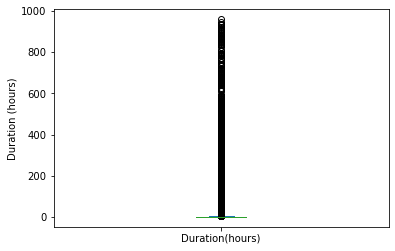

In [132]:
df_duration.loc[df_duration['Disbelievable'] == 'TBD']['Duration(hours)'].plot.box()
plt.ylabel('Duration (hours)')
plt.show()

### Yikes, still way too many outliers for a box plot.  Let's try a simpler approach.

In [133]:
df_duration.loc[df_duration['Disbelievable'] == 'TBD']['Duration(hours)'].describe()

count    7.471623e+06
mean     1.323966e+00
std      5.066253e+00
min      1.666667e-02
25%      3.333333e-01
50%      6.666667e-01
75%      1.283333e+00
max      9.600000e+02
Name: Duration(hours), dtype: float64

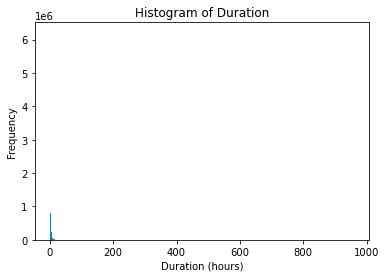

In [134]:
df_duration.loc[df_duration['Disbelievable'] == 'TBD']['Duration(hours)'].plot.hist(bins = 500)
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

### The distribution does not appear to be "normal," so the Empirical Rule does not really apply, but with a mean of 1.32 hours (just under 1h20m) and a standard deviation of 5.07 hours (5h4m), we might hypothetically apply the Empirical Rule to determine that anything longer in duration than (1.32 + (2 x 5.07) = 11.46) hours would be an outlier.  That said, I'm sure some events last for several days in a given area.  To be generous, let's give an event one week of duration before marking it as Disbelievable.

In [135]:
df_duration.loc[(df_duration['Duration(hours)'] > 168), 'Disbelievable'] = 'YES'

In [136]:
df_duration.loc[df_duration['Disbelievable'] == 'TBD']['Duration(hours)'].describe()

count    7.470749e+06
mean     1.282745e+00
std      2.652967e+00
min      1.666667e-02
25%      3.333333e-01
50%      6.666667e-01
75%      1.283333e+00
max      1.680000e+02
Name: Duration(hours), dtype: float64

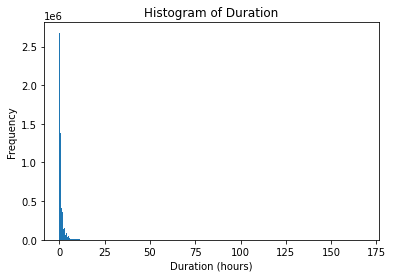

In [137]:
df_duration.loc[df_duration['Disbelievable'] == 'TBD']['Duration(hours)'].plot.hist(bins = 500)
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

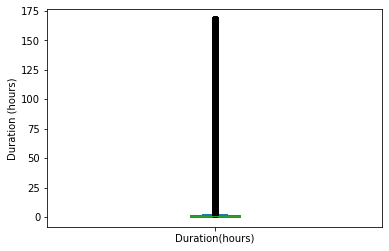

In [138]:
df_duration.loc[df_duration['Disbelievable'] == 'TBD']['Duration(hours)'].plot.box()
plt.ylabel('Duration (hours)')
plt.show()

In [139]:
df_duration.loc[df_duration['Disbelievable'] == 'TBD']['Duration(hours)'].value_counts().sort_index()

0.016667      16303
0.033333      21769
0.050000      25942
0.066667      31126
0.083333      50807
              ...  
167.000000        7
167.500000        1
167.666667        4
167.916667        1
168.000000        5
Name: Duration(hours), Length: 3553, dtype: int64

In [140]:
# What is the percentage of 'TBD' events greater than or equal to 24 hours?

In [141]:
100 * len(df_duration.loc[(df_duration['Disbelievable'] == 'TBD') & (df_duration['Duration(hours)'] >= 24)]['Duration(hours)']) / len(df_duration)

0.1218068976933036

### There are still many outliers for event duration, right up to our cutoff value for believability, but they make up only a fraction of a percent.  I don't think it's worth worrying about them at this point.

### Let's make a new dataframe without any of the rows that have been marked as disbelievable.

In [142]:
df_plausible = df_duration.loc[df_duration['Disbelievable'] == 'TBD']

In [143]:
df_plausible.shape

(7470749, 20)

In [144]:
df_plausible.describe(include='all')

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),Disbelievable
count,7470749,7470749,7470749,7470749,7470749,7.470749e+06,7470749,7470749,7.470749e+06,7.470749e+06,7456264,7470749,7470749,7.411618e+06,7.470749e+06,7.470749e+06,7.470749e+06,7.470749e+06,7.470749e+06,7470749
unique,7470749,7,6,1979673,1938878,NaN,4,2071,NaN,NaN,1716,1100,48,NaN,NaN,NaN,NaN,NaN,NaN,1
top,W-1,Rain,Light,2017-03-12 06:15:00,2016-03-13 06:15:00,NaN,US/Central,K3TH,NaN,NaN,Jacksonville,Lincoln,TX,NaN,NaN,NaN,NaN,NaN,NaN,TBD
freq,1,4395051,4489044,116,103,NaN,3094273,13499,NaN,NaN,31068,76211,515813,NaN,NaN,NaN,NaN,NaN,NaN,7470749
mean,NaN,NaN,NaN,NaN,NaN,8.186330e-02,NaN,NaN,3.873442e+01,-9.192901e+01,NaN,NaN,NaN,5.249286e+04,1.545987e+09,1.545991e+09,4.617880e+03,1.282745e+00,1.681865e-01,NaN
std,NaN,NaN,NaN,NaN,NaN,3.704820e-01,NaN,NaN,5.465160e+00,1.347952e+01,NaN,NaN,NaN,2.571006e+04,5.374878e+07,5.374880e+07,9.550683e+03,2.652967e+00,6.835777e-01,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,2.455710e+01,-1.245550e+02,NaN,NaN,NaN,1.022000e+03,1.451624e+09,1.451625e+09,6.000000e+01,1.666667e-02,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,3.449780e+01,-9.782830e+01,NaN,NaN,NaN,3.131400e+04,1.499713e+09,1.499717e+09,1.200000e+03,3.333333e-01,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,3.927500e+01,-8.982220e+01,NaN,NaN,NaN,5.401700e+04,1.546295e+09,1.546300e+09,2.400000e+03,6.666667e-01,0.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000e-02,NaN,NaN,4.295500e+01,-8.195650e+01,NaN,NaN,NaN,7.352100e+04,1.590265e+09,1.590268e+09,4.620000e+03,1.283333e+00,4.878049e-02,NaN


In [145]:
# Wow, what's this correlation tool?

In [146]:
df_plausible.corr()

,Precipitation(in),LocationLat,LocationLng,ZipCode,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour)
Precipitation(in),1.000000,-0.059686,0.041973,-0.029102,-0.000926,-0.000917,0.048637,0.048637,0.511531
LocationLat,-0.059686,1.000000,-0.169520,0.037575,-0.016407,-0.016397,0.054559,0.054559,-0.095588
LocationLng,0.041973,-0.169520,1.000000,-0.921870,0.018561,0.018557,-0.020428,-0.020428,0.058979
ZipCode,-0.029102,0.037575,-0.921870,1.000000,-0.023905,-0.023904,0.008766,0.008766,-0.041637
StartTime(Epoch),-0.000926,-0.016407,0.018561,-0.023905,1.000000,1.000000,0.001647,0.001647,0.011984
EndTime(Epoch),-0.000917,-0.016397,0.018557,-0.023904,1.000000,1.000000,0.001825,0.001825,0.011971
Duration(seconds),0.048637,0.054559,-0.020428,0.008766,0.001647,0.001825,1.000000,1.000000,-0.073822
Duration(hours),0.048637,0.054559,-0.020428,0.008766,0.001647,0.001825,1.000000,1.000000,-0.073822
PrecipitationRate(inches/hour),0.511531,-0.095588,0.058979,-0.041637,0.011984,0.011971,-0.073822,-0.073822,1.000000


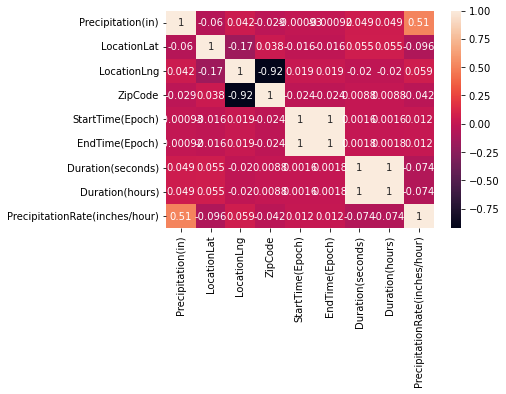

In [147]:
sns.heatmap(df_plausible.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

In [148]:
# None of the correlation results seem illuminating:  even the strong negative correlation between longitude and ZIP code is expected.

In [149]:
# Hmmm, should we group by County?

In [150]:
df_plausible.groupby(['State', 'County']).mean()

Precipitation(in)  LocationLat  LocationLng       ZipCode  \
State County                                                                  
AL    Baldwin              0.105398    30.374105   -87.721673  36536.655441   
      Barbour              0.184453    31.951600   -85.131200  36027.000000   
      Butler               0.174364    31.845700   -86.610700  36037.000000   
      Calhoun              0.193426    33.590400   -85.847900  36203.000000   
      Colbert              0.169176    34.743900   -87.599600  35661.000000   
...                             ...          ...          ...           ...   
WY    Sweetwater           0.015664    41.719146  -109.007089  82750.718302   
      Teton                0.027150    43.654935  -110.722712  82964.319477   
      Uinta                0.011036    41.318070  -110.798429  82931.114956   
      Washakie             0.043707    44.053523  -107.572903  82420.939636   
      Weston               0.001723    43.885400  -104.317900  82701.000000   

                  StartTime(Epoch)  EndTime(Epoch)  Duration(seconds)  \
State County                                                            
AL    Baldwin         1.544849e+09    1.544853e+09        3324.018516   
      Barbour         1.540805e+09    1.540808e+09        3760.447907   
      Butler          1.547689e+09    1.547694e+09        4465.195057   
      Calhoun         1.551432e+09    1.551436e+09        3632.034544   
      Colbert         1.556519e+09    1.556523e+09        3993.385335   
...                            ...             ...                ...   
WY    Sweetwater      1.546070e+09    1.546076e+09        5543.099773   
      Teton           1.552597e+09    1.552605e+09        8690.023529   
      Uinta           1.533577e+09    1.533582e+09        4392.846448   
      Washakie        1.543313e+09    1.543319e+09        6067.141230   
      Weston          1.543008e+09    1.543012e+09        4532.339688   

                  Duration(hours)  PrecipitationRate(inches/hour)  
State County                                                       
AL    Baldwin            0.923338                        0.178013  
      Barbour            1.044569                        0.420748  
      Butler             1.240332                        0.354879  
      Calhoun            1.008898                        0.445915  
      Colbert            1.109274                        0.370498  
...                           ...                             ...  
WY    Sweetwater         1.539750                        0.027299  
      Teton              2.413895                        0.039800  
      Uinta              1.220235                        0.020547  
      Washakie           1.685317                        0.065379  
      Weston             1.258983                        0.002348  

[1536 rows x 9 columns]

In [151]:
df_group_mean = df_plausible.groupby(['State', 'County'])['Duration(hours)'].mean().sort_values(ascending=False)

In [152]:
df_group_mean

State  County        
KY     Madison           7.000000
NY     Schenectady       5.201333
ND     McLean            5.090325
MT     Garfield          4.661431
CA     Ventura County    4.494061
                           ...   
NM     Hidalgo           0.627261
GA     Houston           0.607077
       Chattahoochee     0.595110
OH     Union             0.530894
UT     Wayne             0.409314
Name: Duration(hours), Length: 1536, dtype: float64

<AxesSubplot:xlabel='State,County'>

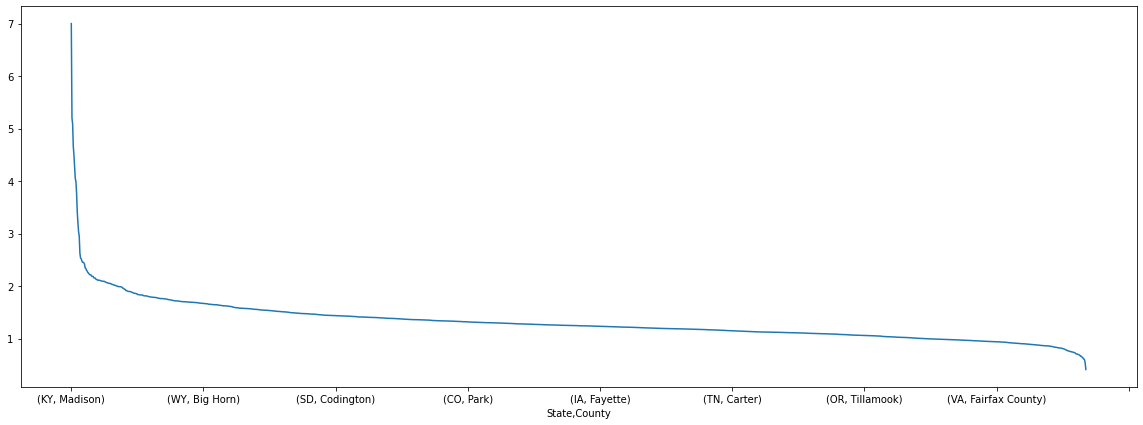

In [153]:
df_group_mean.plot()

In [154]:
df_group_mean_transpose = df_group_mean.transpose()

In [155]:
df_group_mean_transpose

State  County        
KY     Madison           7.000000
NY     Schenectady       5.201333
ND     McLean            5.090325
MT     Garfield          4.661431
CA     Ventura County    4.494061
                           ...   
NM     Hidalgo           0.627261
GA     Houston           0.607077
       Chattahoochee     0.595110
OH     Union             0.530894
UT     Wayne             0.409314
Name: Duration(hours), Length: 1536, dtype: float64

<AxesSubplot:xlabel='State,County'>

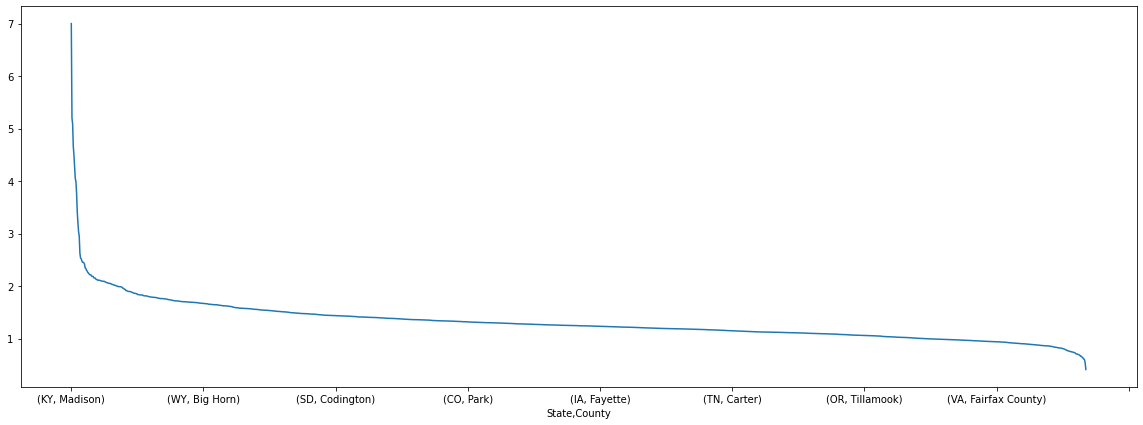

In [156]:
df_group_mean_transpose.plot()

In [157]:
# Hmmm, transposing didn't seem to do anything.

In [158]:
# Oops!  I just remembered to check whether we have specific amounts of precipitation reported for events other
# than Rain, Snow, or Precipitation.

In [159]:
df_plausible.loc[(df_plausible['Type'] != 'Rain') & (df_plausible['Type'] != 'Snow') & (df_plausible['Type'] != 'Precipitation')]['Precipitation(in)'].value_counts()

0.0    1971474
Name: Precipitation(in), dtype: int64

In [160]:
# Phew!  I don't need to go back and check additional precipitation amounts for plausibility.

In [161]:
# Save our cleaned, expanded dataframe to a Pickle file.

In [162]:
df_plausible.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'initial_plausible.Task-6.1.pkl'))